<a href="https://www.kaggle.com/code/ubaydulloasatullaev/crowd-density-video-env-19-10-p3-6?scriptVersionId=160992751" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Setup

In [1]:
import sys
print(sys.version)
print(sys.version_info)

3.6.6 |Anaconda, Inc.| (default, Oct  9 2018, 12:34:16) 
[GCC 7.3.0]
sys.version_info(major=3, minor=6, micro=6, releaselevel='final', serial=0)


In [2]:
!python --version
!pip --version

Python 3.6.6 :: Anaconda, Inc.
pip 19.3.1 from /opt/conda/lib/python3.6/site-packages/pip (python 3.6)


In [3]:
!git clone https://github.com/ZhengPeng7/CSRNet-Keras.git

fatal: destination path 'CSRNet-Keras' already exists and is not an empty directory.


In [4]:
ls

CSRNet-Keras/  output/


In [5]:
cd CSRNet-Keras

/kaggle/working/CSRNet-Keras


In [6]:
ls

CSRNet.py                models/
README.md                utils_callback.py
__pycache__/             utils_gen.py
data/                    utils_imgproc.py
generate_datasets.ipynb  utils_loss.py
main.ipynb               weights_A_MSE_bestMAE67.984_Thu-May-23/
materials/               weights_B_MSE_bestMAE8.31_Sun-May-19/


## Model access

In [7]:
import h5py
print(h5py.__version__)
import cv2
print(cv2.__version__)
import keras
print(keras.__version__)
import tensorflow
print(tensorflow.__version__)
import scipy
print(scipy.__version__)
import tqdm
print(tqdm.__version__)
import matplotlib
print(matplotlib.__version__)
import numpy
print(numpy.__version__)

2.9.0
4.1.1


Using TensorFlow backend.


2.3.1
2.0.0
1.2.1
4.36.1
3.0.3
1.16.4


In [8]:
import os
from keras.optimizers import Adam
from CSRNet import CSRNet

# Settings of network
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
LOSS = 'MSE'
optimizer = Adam(lr=1e-5)

# Create my model
model = CSRNet(input_shape=(None, None, 3))
model.compile(optimizer=optimizer, loss='MSE')

# Load the weights
model_path = "/kaggle/input/crowdcsrnet/other/crowd-csrnet/1/CSRNet_best.hdf5"
model.load_weights(model_path)

In [9]:
# Get the weights
weights = model.get_weights()

In [10]:
# print the details of weights
for i , weight in enumerate(weights):
    print(f"Weight {i}:")
    print(f"Shape: {weight.shape}")
    #print(f"Values: {weight}")

Weight 0:
Shape: (3, 3, 3, 64)
Weight 1:
Shape: (64,)
Weight 2:
Shape: (3, 3, 64, 64)
Weight 3:
Shape: (64,)
Weight 4:
Shape: (3, 3, 64, 128)
Weight 5:
Shape: (128,)
Weight 6:
Shape: (3, 3, 128, 128)
Weight 7:
Shape: (128,)
Weight 8:
Shape: (3, 3, 128, 256)
Weight 9:
Shape: (256,)
Weight 10:
Shape: (3, 3, 256, 256)
Weight 11:
Shape: (256,)
Weight 12:
Shape: (3, 3, 256, 256)
Weight 13:
Shape: (256,)
Weight 14:
Shape: (3, 3, 256, 512)
Weight 15:
Shape: (512,)
Weight 16:
Shape: (3, 3, 512, 512)
Weight 17:
Shape: (512,)
Weight 18:
Shape: (3, 3, 512, 512)
Weight 19:
Shape: (512,)
Weight 20:
Shape: (3, 3, 512, 512)
Weight 21:
Shape: (512,)
Weight 22:
Shape: (3, 3, 512, 512)
Weight 23:
Shape: (512,)
Weight 24:
Shape: (3, 3, 512, 512)
Weight 25:
Shape: (512,)
Weight 26:
Shape: (3, 3, 512, 256)
Weight 27:
Shape: (256,)
Weight 28:
Shape: (3, 3, 256, 128)
Weight 29:
Shape: (128,)
Weight 30:
Shape: (3, 3, 128, 64)
Weight 31:
Shape: (64,)
Weight 32:
Shape: (1, 1, 64, 1)
Weight 33:
Shape: (1,)


## Test new image dataset

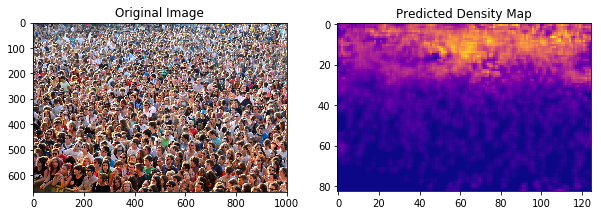

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "/kaggle/input/crowd-detection/R.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB if needed

# Preprocess the image (resize or normalize based on your training preprocessing)
# Ensure the preprocessing is consistent with what was done during training
# For example, you may need to resize the image to match the input size used during training

# Expand dimensions to create a batch of size 1 (as the model expects batches)
input_image = np.expand_dims(image, axis=0)

# Make predictions
predicted_density_map = model.predict(input_image)

# Normalize the density map values to be in the range [0, 1] for better visualization
normalized_density_map = predicted_density_map / np.max(predicted_density_map)

# Display the original image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')

# Display the predicted density map as a heatmap
plt.subplot(1, 2, 2)
plt.imshow(normalized_density_map[0, :, :, 0], cmap='plasma', interpolation='nearest')
plt.title('Predicted Density Map')

plt.show()

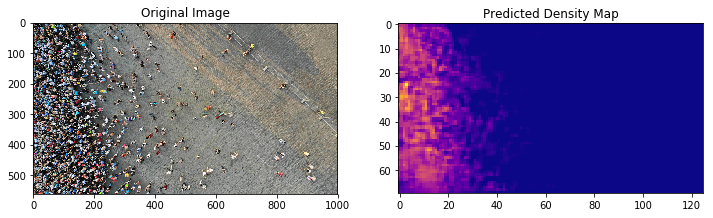

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "/kaggle/input/crowd-detection/1000_F.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB if needed

# Preprocess the image (resize or normalize based on your training preprocessing)
# Ensure the preprocessing is consistent with what was done during training
# For example, you may need to resize the image to match the input size used during training

# Expand dimensions to create a batch of size 1 (as the model expects batches)
input_image = np.expand_dims(image, axis=0)

# Make predictions
predicted_density_map = model.predict(input_image)

# Visualize the original image
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')

# Visualize the predicted density map
plt.subplot(1, 2, 2)
plt.imshow(predicted_density_map[0, :, :, 0], cmap='plasma', interpolation = 'nearest')  # Assuming channel last
plt.title('Predicted Density Map')

plt.show()

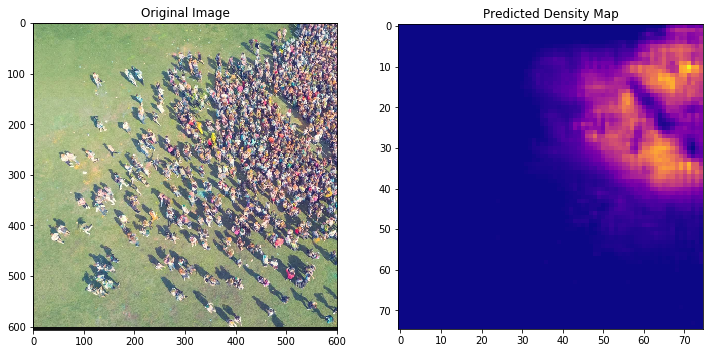

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "/kaggle/input/crowd-detection/101734.png"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB if needed

# Preprocess the image (resize or normalize based on your training preprocessing)
# Ensure the preprocessing is consistent with what was done during training
# For example, you may need to resize the image to match the input size used during training

# Expand dimensions to create a batch of size 1 (as the model expects batches)
input_image = np.expand_dims(image, axis=0)

# Make predictions
predicted_density_map = model.predict(input_image)

# Visualize the original image
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')

# Visualize the predicted density map
plt.subplot(1, 2, 2)
plt.imshow(predicted_density_map[0, :, :, 0], cmap='plasma', interpolation = 'nearest')  # Assuming channel last
plt.title('Predicted Density Map')

plt.show()

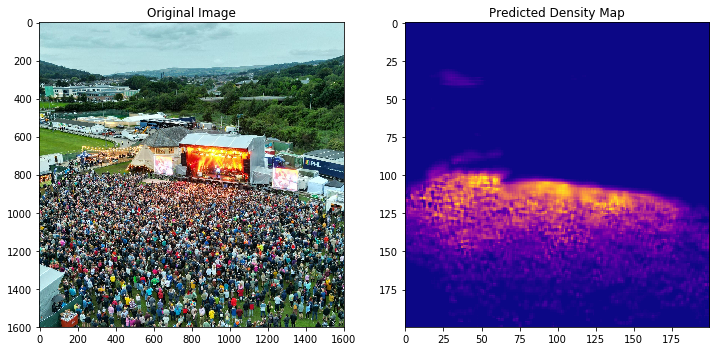

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "/kaggle/input/crowd-detection/Bingley-Weekender-Crowd-Drone-1.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB if needed

# Preprocess the image (resize or normalize based on your training preprocessing)
# Ensure the preprocessing is consistent with what was done during training
# For example, you may need to resize the image to match the input size used during training

# Expand dimensions to create a batch of size 1 (as the model expects batches)
input_image = np.expand_dims(image, axis=0)

# Make predictions
predicted_density_map = model.predict(input_image)

# Visualize the original image
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')

# Visualize the predicted density map
plt.subplot(1, 2, 2)
plt.imshow(predicted_density_map[0, :, :, 0], cmap='plasma', interpolation = 'nearest')  # Assuming channel last
plt.title('Predicted Density Map')

plt.show()

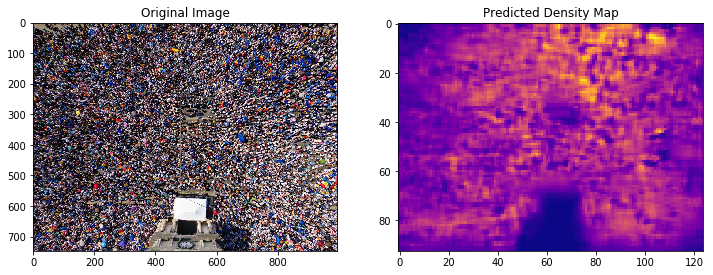

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "/kaggle/input/crowd-detection/aerial-drone-vertical-view-1268-23493.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB if needed

# Preprocess the image (resize or normalize based on your training preprocessing)
# Ensure the preprocessing is consistent with what was done during training
# For example, you may need to resize the image to match the input size used during training

# Expand dimensions to create a batch of size 1 (as the model expects batches)
input_image = np.expand_dims(image, axis=0)

# Make predictions
predicted_density_map = model.predict(input_image)

# Visualize the original image
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')

# Visualize the predicted density map
plt.subplot(1, 2, 2)
plt.imshow(predicted_density_map[0, :, :, 0], cmap='plasma', interpolation = 'nearest')  # Assuming channel last
plt.title('Predicted Density Map')

plt.show()

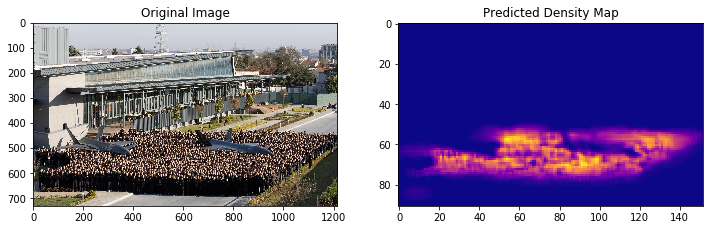

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "/kaggle/input/crowd-detection/crowd.png"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB if needed

# Preprocess the image (resize or normalize based on your training preprocessing)
# Ensure the preprocessing is consistent with what was done during training
# For example, you may need to resize the image to match the input size used during training

# Expand dimensions to create a batch of size 1 (as the model expects batches)
input_image = np.expand_dims(image, axis=0)

# Make predictions
predicted_density_map = model.predict(input_image)

# Visualize the original image
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')

# Visualize the predicted density map
plt.subplot(1, 2, 2)
plt.imshow(predicted_density_map[0, :, :, 0], cmap='plasma', interpolation = 'nearest')  # Assuming channel last
plt.title('Predicted Density Map')

plt.show()

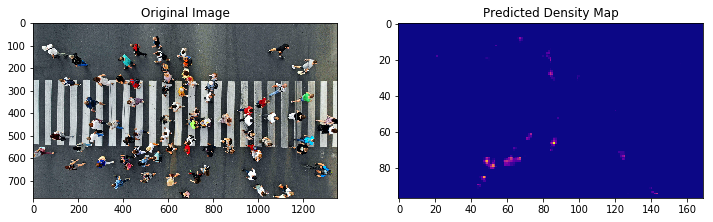

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "/kaggle/input/crowd-detection/iStock-1172741523.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB if needed

# Preprocess the image (resize or normalize based on your training preprocessing)
# Ensure the preprocessing is consistent with what was done during training
# For example, you may need to resize the image to match the input size used during training

# Expand dimensions to create a batch of size 1 (as the model expects batches)
input_image = np.expand_dims(image, axis=0)

# Make predictions
predicted_density_map = model.predict(input_image)

# Visualize the original image
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')

# Visualize the predicted density map
plt.subplot(1, 2, 2)
plt.imshow(predicted_density_map[0, :, :, 0], cmap='plasma', interpolation = 'nearest')  # Assuming channel last
plt.title('Predicted Density Map')

plt.show()

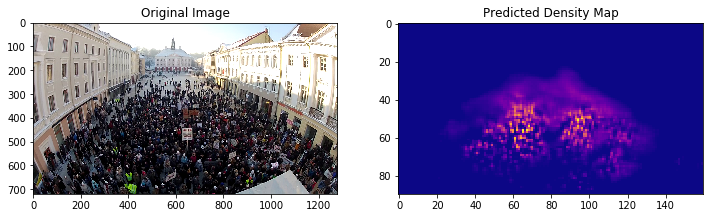

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "/kaggle/input/crowd-detection/vlcsnap2012021221h55m01s134.png"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB if needed

# Preprocess the image (resize or normalize based on your training preprocessing)
# Ensure the preprocessing is consistent with what was done during training
# For example, you may need to resize the image to match the input size used during training

# Expand dimensions to create a batch of size 1 (as the model expects batches)
input_image = np.expand_dims(image, axis=0)

# Make predictions
predicted_density_map = model.predict(input_image)

# Visualize the original image
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')

# Visualize the predicted density map
plt.subplot(1, 2, 2)
plt.imshow(predicted_density_map[0, :, :, 0], cmap='plasma', interpolation = 'nearest')  # Assuming channel last
plt.title('Predicted Density Map')

plt.show()

## Test Video dataset

In [19]:
import cv2
import numpy as np                                     
import matplotlib.pyplot as plt
                                                               
# Path to the video file
video_path = "/kaggle/input/crowd-detection-video/pexels-timo-volz-5544073 (1080p).mp4"

# Open the video file
cap = cv2.VideoCapture(video_path)

# Get video properties
fps = cap.get(cv2.CAP_PROP_FPS)
frame_size = (
    int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),
    int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
)

In [20]:
import os 

# Create a VideoWriter object for output video
output_path = "/kaggle/working/output/video.mp4"
# Create directories if they don't exist
os.makedirs(output_path, exist_ok=True)

fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter(output_path, fourcc, fps, frame_size)

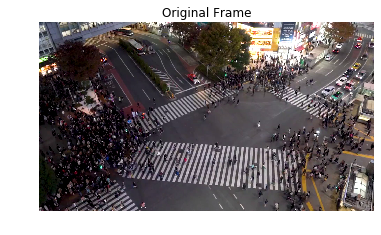

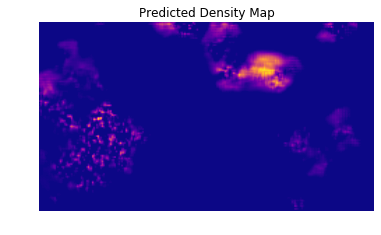

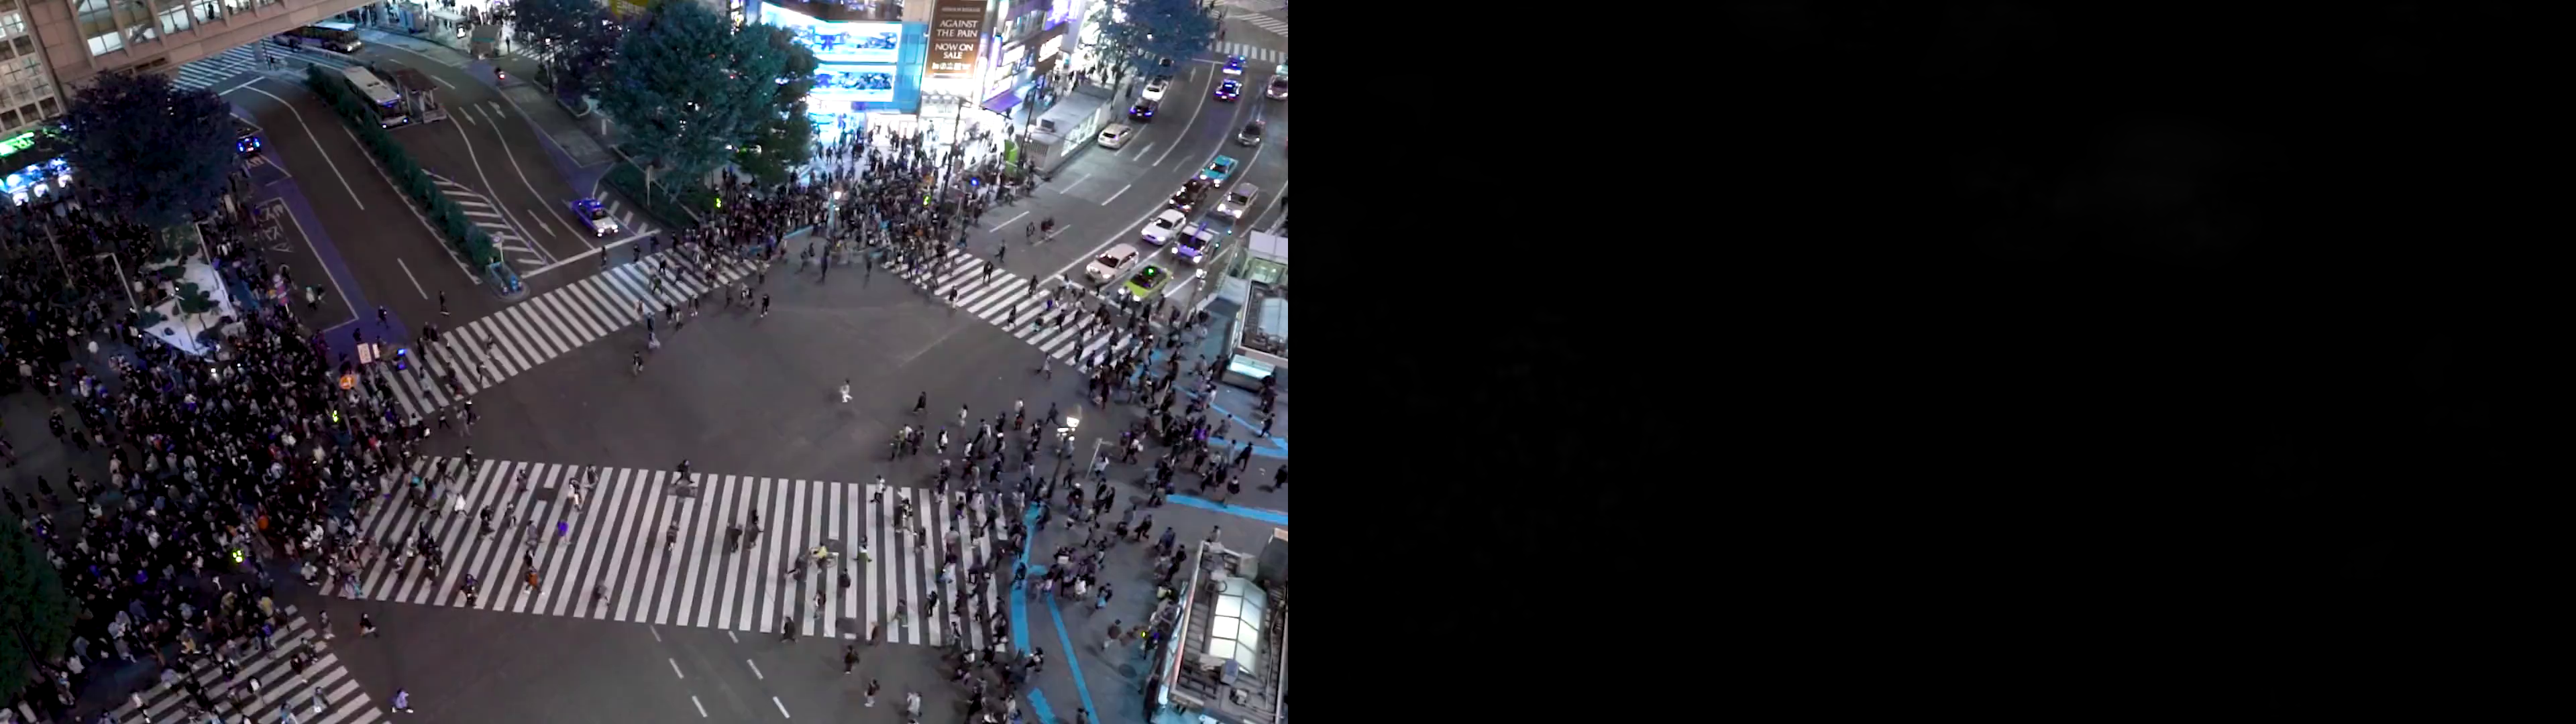

KeyboardInterrupt: 

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Image

while True:
    # Read a frame from the video
    ret, frame = cap.read()
    if not ret:
        break

    # Preprocess the frame (resize or normalize based on your training preprocessing)
    # Ensure the preprocessing is consistent with what was done during training

    # Expand dimensions to create a batch of size 1 (as the model expects batches)
    input_frame = np.expand_dims(frame, axis=0)

    # Make predictions
    predicted_density_map = model.predict(input_frame)

    # Visualize the original frame
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    plt.title('Original Frame')
    plt.axis('off')
    plt.show()

    # Visualize the predicted density map
    density_map = predicted_density_map[0, :, :, 0]
    density_map = cv2.resize(density_map, frame_size)  # Resize density map to match the frame size
    plt.imshow(density_map, cmap='plasma', interpolation='nearest')
    plt.title('Predicted Density Map')
    plt.axis('off')
    plt.show()

    # Concatenate the original frame and predicted density map horizontally for visualization
    visualization = np.hstack((frame, cv2.cvtColor(density_map, cv2.COLOR_GRAY2BGR)))

    # Convert visualization to RGB for display
    visualization_rgb = cv2.cvtColor(visualization, cv2.COLOR_BGR2RGB)

    # Display the frame with visualization
    display(Image(data=cv2.imencode('.png', visualization_rgb)[1]))

    # Write the frame with visualization to the output video
    out.write(visualization)

    # Break the loop if 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release resources
cap.release()
out.release()
cv2.destroyAllWindows()

In [ ]:
import os 

# Directory path for the output video
output_directory = "/kaggle/working/output/"
os.makedirs(output_directory, exist_ok=True)

# Create a VideoWriter object for output video
output_path = os.path.join(output_directory, "video.mp4")
# Create directories if they don't exist
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter(output_path, fourcc, fps, frame_size)

while True:
    # Read a frame from the video
    ret, frame = cap.read()
    if not ret:
        break

    # Preprocess the frame (resize or normalize based on your training preprocessing)
    # Ensure the preprocessing is consistent with what was done during training

    # Expand dimensions to create a batch of size 1 (as the model expects batches)
    input_frame = np.expand_dims(frame, axis=0)

    # Make predictions
    predicted_density_map = model.predict(input_frame)

    # Visualize the predicted density map
    density_map = predicted_density_map[0, :, :, 0]
    density_map = cv2.resize(density_map, frame_size)  # Resize density map to match the frame size

    # Concatenate the original frame and predicted density map horizontally for visualization
    visualization = np.hstack((frame, cv2.cvtColor(density_map, cv2.COLOR_GRAY2BGR)))

    # Convert the visualization image to CV_8U
    visualization = cv2.normalize(visualization, None, 0, 255, cv2.NORM_MINMAX)

    # Write the frame with visualization to the output video
    out.write(visualization.astype(np.uint8))  # Ensure the image is of type CV_8U

    # Break the loop if 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release resources
cap.release()
out.release()
cv2.destroyAllWindows()